In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [44]:
def visualize_grid(filename):
    cmap_reversed = matplotlib.cm.get_cmap('RdYlGn_r')
    dfile = open('Data/'+filename, 'r')

    # Read the second line 
    line = dfile.readline()
    line = dfile.readline()
    gridrow = int(line.split()[2])
    gridcol = int(line.split()[4])

    # Read the eighth line
    line = dfile.readline()
    num_states = int(line.split()[3])
    line = dfile.readline()
    line = dfile.readline()
    line = dfile.readline()
    line = dfile.readline()
    line = dfile.readline()
    steps = int(line.split()[3])
    
    gridarr = np.zeros((gridrow, gridcol))
    
    #create as many arrays as the num states to store the state conditions for each time step 
    for i in range(num_states):
        bararr = np.zeros((num_states, steps))
    
    line = dfile.readline()
    legend = []

    for i in range(steps):
        title = dfile.readline()
        for j in range(gridrow):
            line = dfile.readline()
            for k in range(gridcol):
                gridarr[j][k] = int(line.split()[k])
        plt.pcolor(gridarr, vmin = 0, vmax = num_states, cmap = cmap_reversed, label = gridarr)
        plt.axis('image')
        plt.title(f'Step: {i+1}')
        plt.colorbar()
        plt.show()
        for l in range(num_states):
            line = dfile.readline() 
            bararr[l][i] = int(line.split()[3])
            legend.append("State: "+str(l))
        line=dfile.readline() 
        
    vals = np.arange(steps)
    bar_width = 0.40
    for i in range(num_states):
        float_i = float(i)
        new_width = float_i*bar_width
        plt.bar(vals+new_width, bararr[i][0:steps], width=0.4)
    plt.xticks(vals+(new_width/2), vals)
    plt.xlabel("Time Steps")
    plt.ylabel("State Conditions")
    plt.title("The change in state cells with respect to time")
    plt.legend(legend, loc='upper right')
    plt.tight_layout()
    plt.show()
    
    return 0

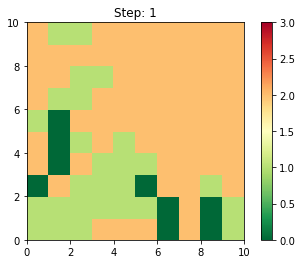

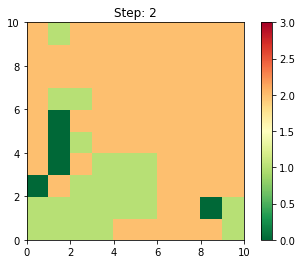

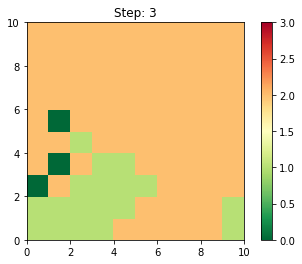

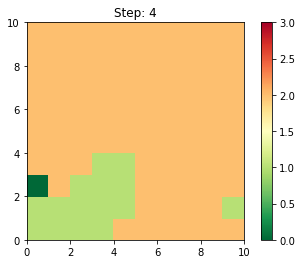

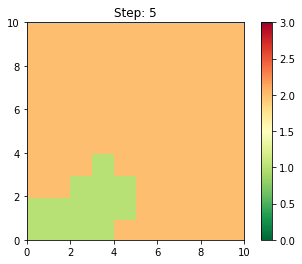

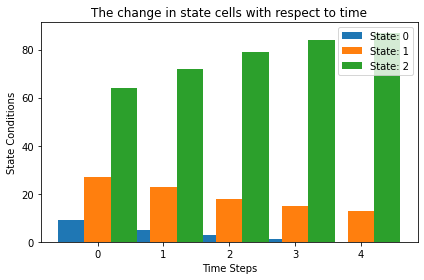

0

In [45]:
visualize_grid('test.txt')